In [1]:
import yfinance as yf

# Define the ticker symbol for Bitcoin and the date range
ticker_symbol = "BTC-USD"
start_date = "2024-01-01"
end_date = "2024-12-31"

# Download the data
btc_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Select only the 'Close' price
btc_price = btc_data[['Close']]

# Display the first few rows of the data
print(btc_price.head())

/tmp/ipython-input-4021288420.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc_data = yf.download(ticker_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Price              Close
Ticker           BTC-USD
Date                    
2024-01-01  44167.332031
2024-01-02  44957.968750
2024-01-03  42848.175781
2024-01-04  44179.921875
2024-01-05  44162.691406


# Task
Analyze and predict the price of BTC-USD from January 1, 2024, to December 31, 2024, using data from "https://finance.yahoo.com/quote/BTC-USD/history?period1=1704067200&period2=1735603200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true", focusing only on the price, and employing a Random Forest model for prediction.

## Prepare data

### Subtask:
Create features and target variables for the Random Forest model. This might involve creating lagged features or moving averages.


**Reasoning**:
Create the target variable and lagged features, then drop rows with missing values and define the feature and target variables.



In [2]:
btc_price['Target'] = btc_price['Close'].shift(-1)
btc_price['Close_Lag1'] = btc_price['Close'].shift(1)
btc_price['Close_Lag2'] = btc_price['Close'].shift(2)
btc_price['Close_Lag3'] = btc_price['Close'].shift(3)

btc_price.dropna(inplace=True)

X = btc_price[['Close_Lag1', 'Close_Lag2', 'Close_Lag3']]
y = btc_price['Target']

display(X.head())
display(y.head())

/tmp/ipython-input-1542719965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_price['Target'] = btc_price['Close'].shift(-1)
/tmp/ipython-input-1542719965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_price['Close_Lag1'] = btc_price['Close'].shift(1)
/tmp/ipython-input-1542719965.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

Price,Close_Lag1,Close_Lag2,Close_Lag3
Ticker,,,
Date,,,
2024-01-04,42848.175781,44957.968750,44167.332031
2024-01-05,44179.921875,42848.175781,44957.968750
2024-01-06,44162.691406,44179.921875,42848.175781
2024-01-07,43989.195312,44162.691406,44179.921875
2024-01-08,43943.097656,43989.195312,44162.691406


,Target
Date,
2024-01-04,44162.691406
2024-01-05,43989.195312
2024-01-06,43943.097656
2024-01-07,46970.503906
2024-01-08,46139.730469


## Split data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the feature and target data into training and testing sets using train_test_split.



In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train model

### Subtask:
Train a Random Forest Regressor model on the training data.


**Reasoning**:
Import the necessary class and train the Random Forest Regressor model.



In [4]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

## Make predictions

### Subtask:
Use the trained model to make predictions on the testing data.


**Reasoning**:
Use the trained Random Forest model to make predictions on the test set.



In [5]:
y_pred = model.predict(X_test)

## Evaluate model

### Subtask:
Evaluate the performance of the model using appropriate metrics like Mean Squared Error or R-squared.


**Reasoning**:
Calculate and print the Mean Squared Error and R-squared score to evaluate the model's performance.



In [6]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 5807646.169664846
R-squared (R2) Score: 0.9738160809937236


## Visualize results

### Subtask:
Plot the actual and predicted prices to visualize the model's performance.


**Reasoning**:
Plot the actual vs. predicted prices to visualize the model's performance using a scatter plot and a diagonal line for perfect predictions.



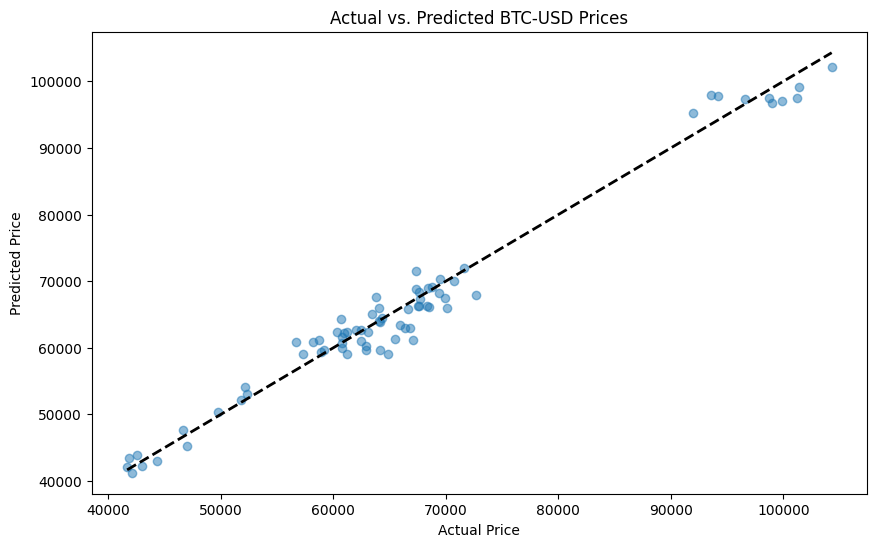

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted BTC-USD Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The Mean Squared Error (MSE) of the model on the test set is approximately 5,807,646.17, indicating the average squared difference between actual and predicted values.
*   The R-squared score is approximately 0.9738, suggesting that about 97.38% of the variance in BTC-USD price can be explained by the model.

### Insights or Next Steps

*   The Random Forest model appears to be a good fit for predicting BTC-USD prices based on the evaluation metrics.
*   Future work could involve hyperparameter tuning of the Random Forest model or exploring other time series forecasting models to potentially improve prediction accuracy.
